$\textbf{Homework October 9th}$


$\textbf{1. Find the CDF for the Gaussian distribution and reproduce the plots. Choose a random number between 0 and 1, and use the CDF to 
assign the corresponding value to H0. Generate as many as you want and make the histogram of H0 o verify you did it right, 
use a mean of 70 and a sigma of 2}$


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
import math

In [106]:
mu, sigma = 70, 2

In [107]:
#generamos datos de manera aleatoria
dat = np.random.normal(mu, sigma, 1000)

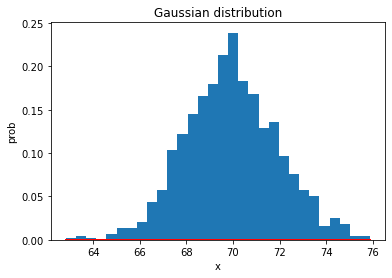

In [127]:
count, bins, ignored = plt.hist(dat, 30, density=True)
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),linewidth=2,color='r')
plt.title('Gaussian distribution')
plt.xlabel('x')
plt.ylabel('prob')
plt.show()

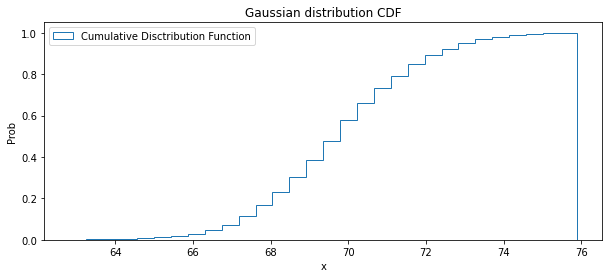

In [109]:
#Encontramos la CDF
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(dat, bins, density=True, histtype='step',cumulative=True, label='Cumulative Disctribution Function')

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

#ax.plot(bins, y, 'k--', linewidth=1.5, label='CDF Teorico')

ax.grid(False)
ax.legend(loc='upper left')
ax.set_title('Gaussian distribution CDF')
ax.set_xlabel('x')
ax.set_ylabel('Prob')

plt.show()

$\textbf{2. For the Poisson and Binomial, etc distributions mentioned, find the CDF mean and standard deviation.Plot the PDF and CDF, for some different values of mean and sigma}$

$\textbf{Binomial distribution}$

The binomial distribution is used to represent the number of events that occurs within n independent trials.
Possible values are integers from zero to n. Is given by the formula:

$$
P(r; n, p) = \binom{n}{r}p^{r}(1-p)^{n-r}
$$

where $0 \leq p \leq 1$, $n \geq 0$ and $0 \leq r \leq N$.

Cumulative probability function


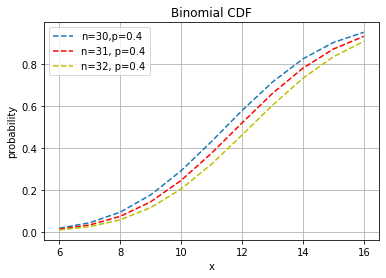

In [110]:
N, p = 30, 0.4 
N2, p2 = 31, 0.4
N3, p3 = 32, 0.4

# Mean
mu = N*p
# Standard deviation
sigma = np.sqrt(N*p*(1-p))

binomial = binom(N, p) 
binomial2 = binom(N2,p2)
binomial3 = binom(N3, p3)
x = np.arange(6,17,1)
CDF = binomial.cdf(x) 
CDF2 = binomial2.cdf(x)
CDF3 = binomial3.cdf(x)
plt.plot(x, CDF, '--', label='n=30,p=0.4')
plt.plot(x,CDF2, '--', color='r', label='n=31, p=0.4')
plt.plot(x,CDF3, '--', color='y', label='n=32, p=0.4')
plt.legend()
plt.title('Binomial CDF')
plt.ylabel('probability')
plt.grid()
plt.xlabel('x')
plt.show()

Probability density function

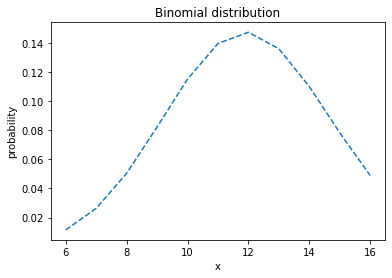

In [111]:
fmp = binomial.pmf(x)
plt.plot(x, fmp, '--')
plt.title('Binomial distribution')
plt.ylabel('probability')
plt.xlabel('x')
plt.show()

$\textbf{Poisson distribution}$

The Poisson distribution is used to model the number of events occurring within a given time interval. 
The formula for the Poisson probability mass function is:
$$
P(r; \mu) = \frac{e^{-{\mu}}\mu^{r}}{r!}  
$$
for r = 0,1,2


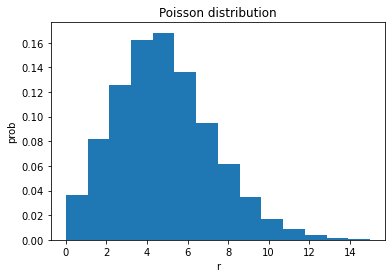

In [130]:

s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.title('Poisson distribution')
plt.xlabel('r')
plt.ylabel('prob')
plt.show()

Cumulative Probability Function

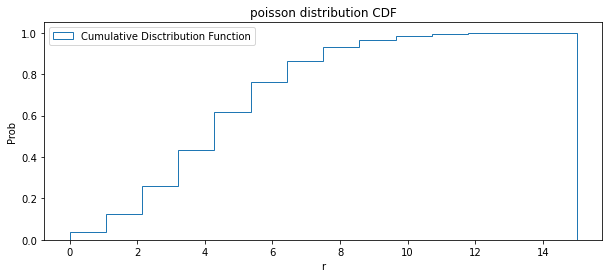

In [135]:
mu, r = 30, 2

#Encontramos la CDF
fig, ax = plt.subplots(figsize=(10, 4))
n, bins, patches = ax.hist(s, bins, density=True, histtype='step',cumulative=True, label='Cumulative Disctribution Function')

y = (np.exp(-mu)* mu**r/np.math.factorial(r))
y = y.cumsum()
y /= y[-1]

#ax.plot(bins, y, 'k--', linewidth=1.5, label='CDF Teorico')

ax.grid(False)
ax.legend(loc='upper left')
ax.set_title('poisson distribution CDF')
ax.set_xlabel('r')
ax.set_ylabel('Prob')

plt.show()

$\textbf{3. If $y = \Phi(x)=exp(x)$ y $p(x)=1$ para $0\leq x\leq 1$. What is the resultant distribution for $y$}$

Sea $x$ la variable medible, y  $y(x)$ es resultado final de tal medición. Si conocemos la PDF $p(x)$, podemos escribir 

$$
    p(y)=p_{x}[\Phi^{-1}(y)]\left|\frac{d\Phi^{-1}(y)}{dy}\right|. 
$$

Consideremos que $p(x)=1$ para $0\leq x \leq 1$ y $y=\Phi(x)=exp(x)$, luego podemos escribir $\Phi^{-1}(y)=\ln{y}$, de tal forma que 

$$
    p(y)=\frac{d(\ln{y})}{dy}=\frac{1}{y}. 
$$

en donde $p_{x}(\Phi^{-1}(y))=1$. 

$\textbf{4. Show explicitly that the linear least squared method is derived from the minimization of the chi-squared when the model is a straight line.}$

Empezamos escribiendo la definición de $\chi^2$: 

   $$\chi^2=\frac{\sum\left(y_{i}-y(x_{i},\theta)\right)^{2}}{\sigma^2}$$

donde $y_{i}$ y $x_{i}$ son un conjunto de datos experimentales, $y$ es la función camos a aproximar y $\theta$ es un parámetro libre. Queremos encontrar los parámetros libres que minimizan la ecuació anterior, para lograr esto calculamos la parcial de $\chi$ con respecto al parámetro libre en cuestión, de manera general tenemos:
 
   $$\frac{\partial \chi^2}{\partial\theta}=0$$

Cuando se quiere hacer un ajuste lineal, los parámetros libres son $a$ y $b$, siendo que la forma general de la ecuación de la recta es:

   $$ y=ax+b$$
   
De este modo, la parcial se escribe en la forma:
    $$\frac{\partial \chi^2}{\partial a}=\frac{2\sum\left(y_{i}-y(x_{i},\theta)x_{i}\right)}{\sigma^2}=0$$

   $$ \frac{\partial \chi^2}{\partial b}=\frac{2\sum\left(y_{i}-y(x_{i},\theta)\right)}{\sigma^2}=0$$
   
Con esto, obtenemos un sistema de ecuaciones:

$$    \sum\left(y_{i}-ax_{i}-b\right)x_{i}=0\\$$
    $$\sum\left(y_{i}-ax_{i}-b\right)=0$$

De la segunda ecuación tenemos:

$$b=\frac{1}{n}\left(\sum y_{i}-a\sum x_{i}\right)$$

Además, también:

$$\sum y_{i}x_{i}-a\sum x_{i}^{2}-b\sum x_{i}=0$$

Si sustituimos $b$, obtenemos:

$$\sum y_{i}x_{i}-a\sum x_{i}^{2}-\frac{1}{n}\left(\sum y_{i}-a\sum x_{i}\right)\sum x_{i}=0$$



$$n\sum y_{i}x_{i}-an\sum x_{i}^{2}-\sum y_{i}\sum x_{i}+a\sum x_{i}\sum x_{i}=0$$


Despejamos $a$:

$$a=\frac{n\sum y_{i}x_{i}-\sum y_{i}\sum x_{i}}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}$$


Luego:

$$b=\frac{1}{n}\left(\sum y_{i}-\left[\frac{n\sum y_{i}x_{i}-\sum y_{i}\sum x_{i}}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}\right]\sum x_{i}\right)$$

Despejamos $b$ y simplificamos: 

$$b=\frac{\sum y_{i}\sum x_{i}^{2}-\frac{1}{n}\sum y_{i}\left(\sum x_{i}\right)^2-\sum y_{i}x_{i}\sum x_{i}+\frac{1}{n}\sum y_{i}\left(\sum x_{i}\right)^2}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}$$

$$b=\frac{\sum y_{i}\sum x_{i}^{2}-\sum y_{i}x_{i}}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}$$

Obtenemos finalmente que $a$ y $b$ están dados por:

$$a=\frac{n\sum y_{i}x_{i}-\sum y_{i}\sum x_{i}}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}, \quad  b=\frac{\sum y_{i}\sum x_{i}^{2}-\sum y_{i}x_{i}}{n\sum x_{i}^{2}-\left(\sum x_{i}\right)^2}$$

$\textbf{5.Write down a Poisson likelihood, and identify which parameters correspond to the data and which to the model}$